## Grokking Hacking Part 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
p=113

### 1. Sum of Sines/Cosines

In [22]:
m=np.zeros((p,p))
for i in range(p):
    for j in range(p):
        m[i, j] = np.cos(2*np.pi*((52*i)/113)) + np.cos(2*np.pi*((52*j)/113))

(-0.5, 112.5, 112.5, -0.5)

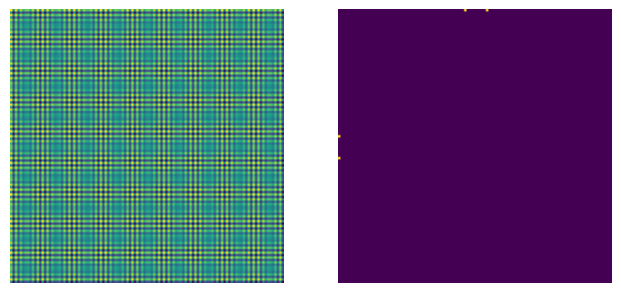

In [23]:
F = np.fft.fft2(m)

fig=plt.figure(0, (12, 6))
fig.add_subplot(1,3,1); plt.imshow(m); plt.axis('off')
fig.add_subplot(1,3,2); plt.imshow(np.abs(F));  plt.axis('off')

Ah i see it's an alias! We're going past the nyquist frequency -> ok, that's making some sense. 

In [5]:
m=np.zeros((p,p))
for i in range(p):
    for j in range(p):
        m[i, j] = np.cos(2*np.pi*((43*i)/113))+\
                  np.cos(2*np.pi*((61*i)/113))+\
                  np.cos(2*np.pi*((43*j)/113))+\
                  np.cos(2*np.pi*((61*j)/113))

(-0.5, 112.5, 112.5, -0.5)

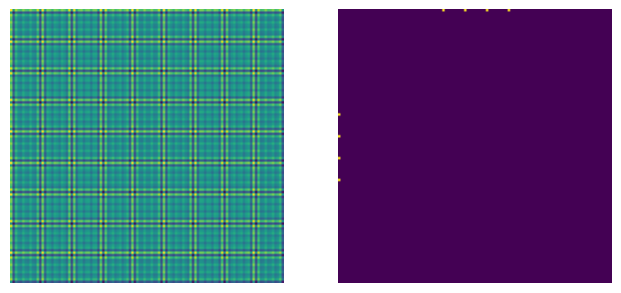

In [6]:
F = np.fft.fft2(m)

fig=plt.figure(0, (12, 6))
fig.add_subplot(1,3,1); plt.imshow(m); plt.axis('off')
fig.add_subplot(1,3,2); plt.imshow(np.abs(F));  plt.axis('off')

Ok so I think that many of the plots I've been seeing are actually single frequency -> that's great!

### 2. Product of Sines/Cosines

In [7]:
m=np.zeros((p,p))
for i in range(p):
    for j in range(p):
        m[i, j] = np.cos(2*np.pi*((43*i)/113))*np.cos(2*np.pi*((43*i)/113))

(-0.5, 112.5, 112.5, -0.5)

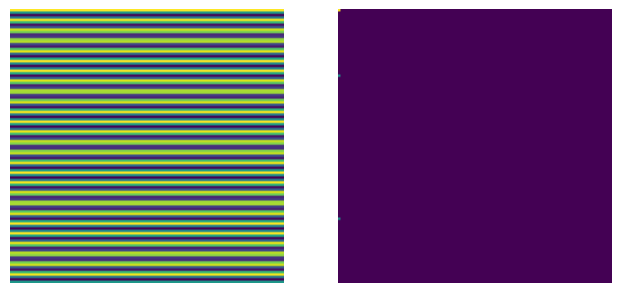

In [8]:
F = np.fft.fft2(m)

fig=plt.figure(0, (12, 6))
fig.add_subplot(1,3,1); plt.imshow(m); plt.axis('off')
fig.add_subplot(1,3,2); plt.imshow(np.abs(F));  plt.axis('off')

In [9]:
m=np.zeros((p,p))
for i in range(p):
    for j in range(p):
        m[i, j] = np.cos(2*np.pi*((43*i)/113))*np.cos(2*np.pi*((43*j)/113))

(-0.5, 112.5, 112.5, -0.5)

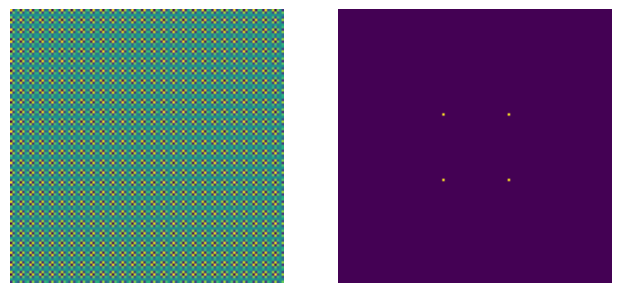

In [10]:
F = np.fft.fft2(m)

fig=plt.figure(0, (12, 6))
fig.add_subplot(1,3,1); plt.imshow(m); plt.axis('off')
fig.add_subplot(1,3,2); plt.imshow(np.abs(F));  plt.axis('off')

In [11]:
m=np.zeros((p,p))
for i in range(p):
    for j in range(p):
        m[i, j] = np.cos(2*np.pi*((43*i)/113))*np.cos(2*np.pi*((61*j)/113))

(-0.5, 112.5, 112.5, -0.5)

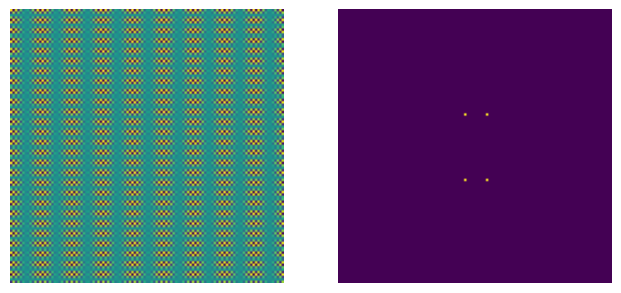

In [12]:
F = np.fft.fft2(m)
fig=plt.figure(0, (12, 6))
fig.add_subplot(1,3,1); plt.imshow(m); plt.axis('off')
fig.add_subplot(1,3,2); plt.imshow(np.abs(F));  plt.axis('off')

Ok square vs rectangle is about if the product is between two examples of the same frequency or not

In [13]:
m=np.zeros((p,p))
for i in range(p):
    for j in range(p):
        m[i, j] = np.cos(2*np.pi*((43*i)/113))*np.sin(2*np.pi*((43*j)/113))

F = np.fft.fft2(m)

(-0.5, 112.5, 112.5, -0.5)

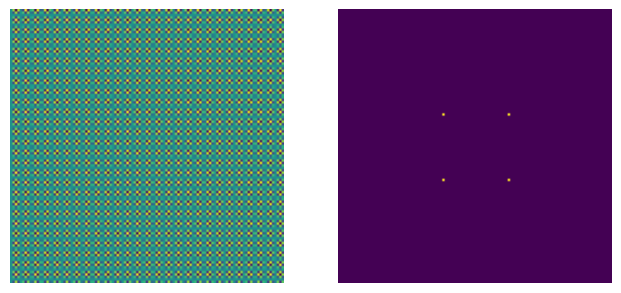

In [14]:

fig=plt.figure(0, (12, 6))
fig.add_subplot(1,3,1); plt.imshow(m); plt.axis('off')
fig.add_subplot(1,3,2); plt.imshow(np.abs(F));  plt.axis('off')

- Cool yeah get a square with sin or cosine.
- Ok, now thg bigger kinda crazy one
- hahaha ok this is probably a terrible idea, but does't this trig identity come from complex numbers
- Can we show that the network is learning to like cancel out rotation/frequencies? That would be nuuts

### 3. Fancy Trig Action

In [15]:
m=np.zeros((p,p))
for i in range(p):
    for j in range(p):
        m[i, j] = np.sin(2*np.pi*((43*i)/113))*np.cos(2*np.pi*((43*j)/113))+\
                  np.cos(2*np.pi*((43*i)/113))*np.sin(2*np.pi*((43*j)/113))

(-0.5, 112.5, 112.5, -0.5)

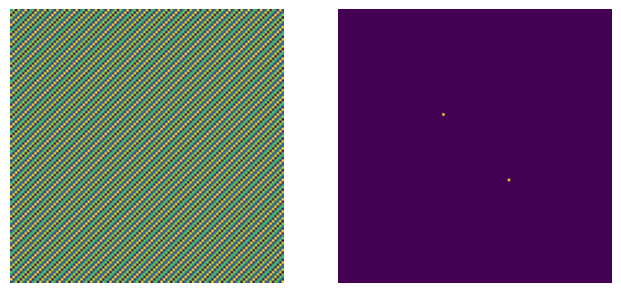

In [16]:
F = np.fft.fft2(m)
fig=plt.figure(0, (12, 6))
fig.add_subplot(1,3,1); plt.imshow(m); plt.axis('off')
fig.add_subplot(1,3,2); plt.imshow(np.abs(F));  plt.axis('off')

### 4. Can I watch things cancel out as I bring in the second componenent, or another fun animation idea would be bring the two surfaces together...

In [20]:
m1=np.zeros((p,p))
for i in range(p):
    for j in range(p):
        m1[i, j] = np.sin(2*np.pi*((43*i)/113))*np.cos(2*np.pi*((43*j)/113))

m2=np.zeros((p,p))
for i in range(p):
    for j in range(p):
        m2[i, j] = np.cos(2*np.pi*((43*i)/113))*np.sin(2*np.pi*((43*j)/113))



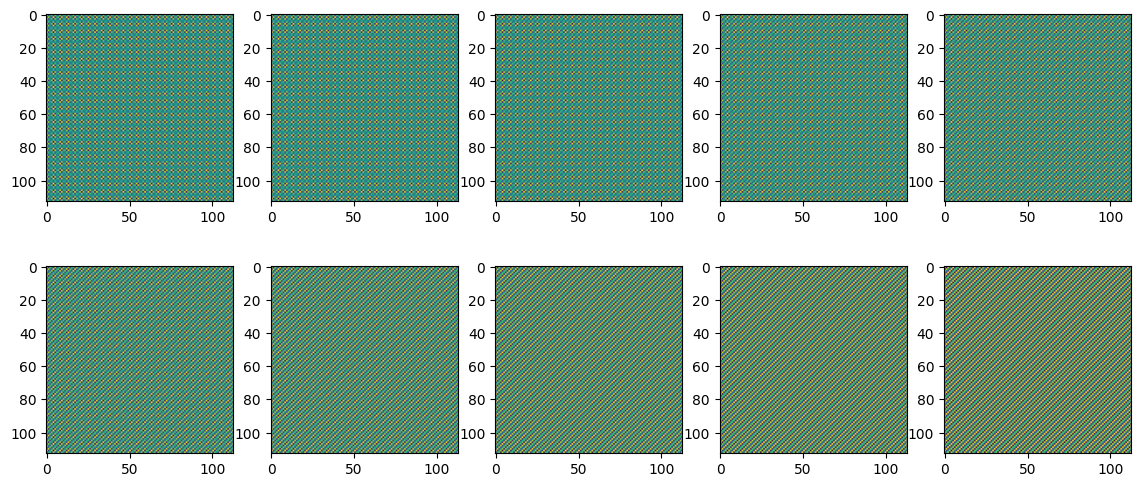

In [21]:
fig=plt.figure(0, (14, 6, ))
for i in range(10):
    fig.add_subplot(2,5,i+1)
    plt.imshow(m1+(i/9)*m2)

A lower frequency would be nice, maybe we can sort that out, do more runs try to find one with lower frequencies, but this "symmetry revealing" is pretty cool!